In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/companies-in-india/notable_companies (1).csv


In [2]:
df = pd.read_csv('/kaggle/input/companies-in-india/notable_companies (1).csv')

df.head()

,Name,Industry,Sector,Headquarters,Founded,Notes,Private/State,Active/Defunct
0,63 Moons Technologies,Technology,Software,Mumbai,1988,Financial technology,P,A
1,Aban Offshore,Energy,Oil & gas offshore drilling & other services,Chennai,1986,"Oil, petrochemical",P,A
2,ABG Shipyard,Industrials,Shipbuilding,Ahmedabad,1985,Ship engineering,P,A
3,ABP Group,Consumer services,Broadcasting & entertainment,Kolkata,1922,"Media, news",P,A
4,ACC,Industrials,Cement,Mumbai,1936,Cement,P,A


In [3]:
df.shape

(493, 8)

In [4]:
df.info()

df.isnull().sum()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            493 non-null    object
 1   Industry        493 non-null    object
 2   Sector          448 non-null    object
 3   Headquarters    493 non-null    object
 4   Founded         493 non-null    object
 5   Notes           490 non-null    object
 6   Private/State   493 non-null    object
 7   Active/Defunct  493 non-null    object
dtypes: object(8)
memory usage: 30.9+ KB


,Name,Industry,Sector,Headquarters,Founded,Notes,Private/State,Active/Defunct
count,493,493,448,493,493,490,493,493
unique,493,19,101,61,133,371,2,2
top,63 Moons Technologies,Industrials,Banks,Mumbai,1986,Pharma,P,A
freq,1,112,31,149,12,11,390,484


In [5]:
df_cleaned = df.dropna()

df_cleaned.isnull().sum()

Name              0
Industry          0
Sector            0
Headquarters      0
Founded           0
Notes             0
Private/State     0
Active/Defunct    0
dtype: int64

### Exploring Industry and Sector

In [6]:
industries = df_cleaned['Industry'].unique()
sectors = df_cleaned['Sector'].unique()

print(f'Number of unique industries: {len(industries)}')
print(f'Number of unique sectors: {len(sectors)}')

df_cleaned['Industry'].value_counts().head(10)
df_cleaned['Sector'].value_counts().head(10)

Number of unique industries: 18
Number of unique sectors: 101


Sector
Banks                           30
Consumer digital services       22
Business support services       18
Automobiles                     17
Consumer electronics            15
Broadcasting & entertainment    15
Food products                   14
Pharmaceuticals                 12
Alternative electricity         10
Airlines                        10
Name: count, dtype: int64

### Visualizing Industry Distribution

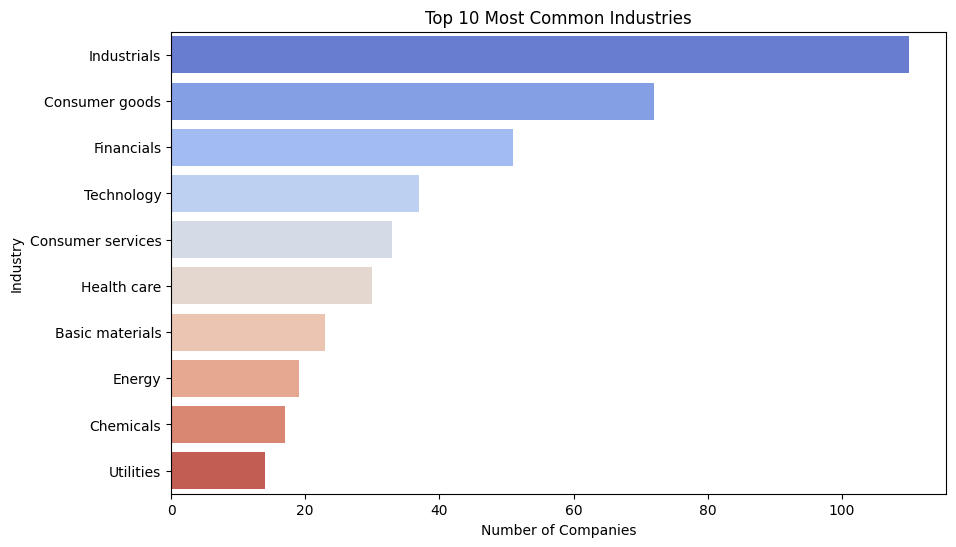

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(y='Industry', data=df_cleaned, order=df_cleaned['Industry'].value_counts().iloc[:10].index, palette='coolwarm')
plt.title('Top 10 Most Common Industries')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.show()

### Defunct Companies Analysis

The dataset includes companies that have ceased operations, which are labeled as "defunct". The chart below gives a visual representation of the proportion of defunct vs. active companies.

Active/Defunct
A    98.2
D     1.8
Name: proportion, dtype: float64


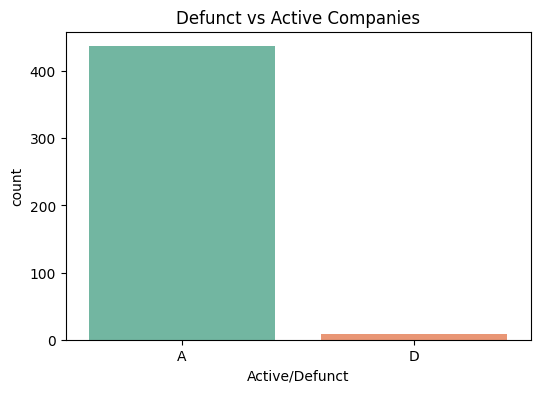

In [8]:
df_cleaned['Active/Defunct'].value_counts()

defunct_percentage = (df_cleaned['Active/Defunct'].value_counts(normalize=True) * 100).round(2)
print(defunct_percentage)

plt.figure(figsize=(6,4))
sns.countplot(x='Active/Defunct', data=df_cleaned, palette='Set2')
plt.title('Defunct vs Active Companies')
plt.show()

### Country-wise Company Distribution

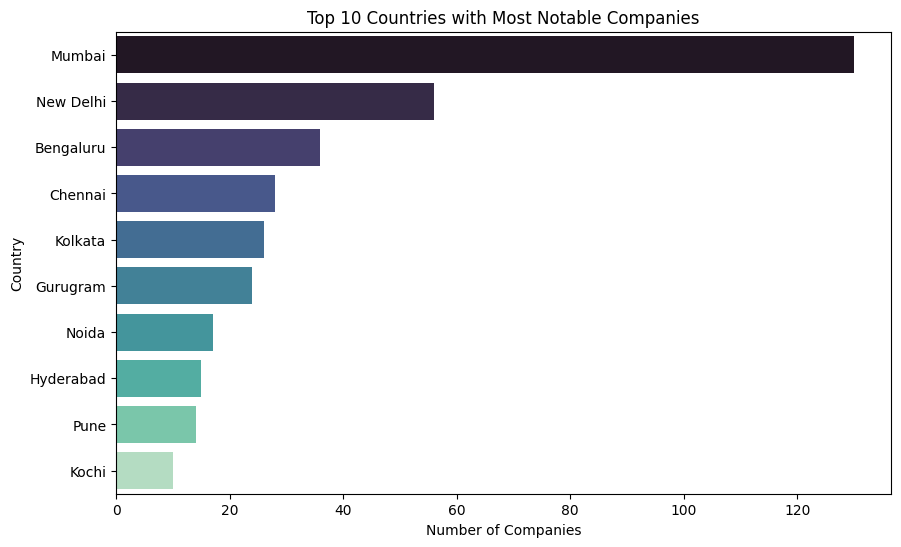

In [9]:
top_countries = df_cleaned['Headquarters'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title('Top 10 Countries with Most Notable Companies')
plt.xlabel('Number of Companies')
plt.ylabel('Country')
plt.show()

### Conclusion

In this analysis, we explored the Notable Companies dataset by examining various features such as industry, sector, country, and the status of companies (active vs. defunct). Our visualizations provided a clear understanding of the most prevalent industries and countries that house these companies.